1. Use a função pd.read_csv() para carregar o dataset insurance.csv, anexo nesta aula; armazene em uma variável;

In [27]:
import pandas as  pd
import numpy as np

In [28]:
df = pd.read_csv('insurance.csv')


2.  Mostre a quantidade de linhas e colunas (shape);

In [29]:
df.shape

(1338, 7)

3. Mostre informações básicas do dataset com a função info();

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


4. Mostre o dtype de cada coluna;

In [31]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

5. Mostre as colunas do dataset;

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

6. Mostre informações estatísticas da coluna 'age';

In [33]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

7. Imprima os valores únicos de cada coluna, com exceção da coluna bmi;

In [34]:
# cria um loop para mostrar os valores únicos de cada coluna, exclusive coluna bmi
for col in df:
    if col == 'bmi':
        continue
    else:
        print(col.upper())
        print(df[col].unique())
        print()

AGE
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

SEX
['female' 'male']

CHILDREN
[0 1 3 2 5 4]

SMOKER
['yes' 'no']

REGION
['southwest' 'southeast' 'northwest' 'northeast']

CHARGES
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]



8. Mostre a distribuição das idades;

In [35]:
df['age'].value_counts().sort_index()

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

9. Verifique se há missing no dataset;

In [36]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

10. Verifique se há linhas duplicadas no DataFrame, caso existam linhas duplicadas delete;

In [37]:
# verifica se há linhas duplicadas
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [38]:
# remove as linhas duplicadas
df = df.drop_duplicates()

11. Mostre as variáveis com o tipo de dado object;

In [39]:
df.select_dtypes(include = 'object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


12. Mostre apenas as colunas numéricas do dataset;

In [40]:
df.select_dtypes(include= ['float', 'int']) #ou df.select_dtypes(exclude = 'object')

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


13. Converta as colunas numéricas para uma lista;

In [41]:
colunas_numericas = df.select_dtypes(include = ['float', 'int']).columns.tolist()

14. Converta as colunas não numéricas para uma lista;

In [42]:
colunas_categoricas = df.select_dtypes(include = 'object').columns.tolist()

15. Converta o dtype das variáveis sex, smoker e region para category; confira novamente o dtype das colunas;

In [44]:
for col in colunas_categoricas:
    df[col] = df[col].astype('category')


In [45]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

16. Mostre estatísticas descritivas das colunas categóricas;

In [46]:
df[colunas_categoricas].describe().T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


17. Mostre estatísticas descritivas das colunas numéricas;

In [48]:
df[colunas_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


18. Mostre a proporção entre homens e mulheres;

In [49]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

19. Retorne todas as pessoas com idade igual ou superior a 62 anos;

In [51]:
df[df['age'] >= 62]   #ou df.loc[df['age']>=62]  ou  df.query('age >= 62')

,age,sex,bmi,children,smoker,region,charges
11,62,female,26.290,0,yes,southeast,27808.72510
26,63,female,23.085,0,no,northeast,14451.83515
33,63,male,28.310,0,no,northwest,13770.09790
36,62,female,32.965,3,no,northwest,15612.19335
62,64,male,24.700,1,no,northwest,30166.61817
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1265,64,male,23.760,0,yes,southeast,26926.51440
1301,62,male,30.875,3,yes,northwest,46718.16325
1321,62,male,26.695,0,yes,northeast,28101.33305


20. Retorne todas as pessoas com idade igual a 18 anos;

In [53]:
df[df['age'] == 18]  #df.query('age == 18') ou df.loc[df['age']==18]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1296,18,male,26.125,0,no,northeast,1708.92575
1315,18,male,28.310,1,no,northeast,11272.33139
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


21. Conte quantas pessoas residem na região 'southwest';

In [57]:
df[df['region'] == 'southwest'].shape[0]  #df.loc[df['region'] == 'southwest'].shape[0]

325

22. Ordene o DataFrame pela coluna 'age' em ordem crescente;

In [59]:
df2 = df.sort_values(by = 'age', ascending = True)
df2

,age,sex,bmi,children,smoker,region,charges
866,18,male,37.290,0,no,southeast,1141.44510
911,18,male,31.730,0,yes,northeast,33732.68670
1248,18,female,39.820,0,no,southeast,1633.96180
781,18,male,41.140,0,no,southeast,1146.79660
600,18,female,39.160,0,no,southeast,1633.04440
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
378,64,female,30.115,3,no,northwest,16455.70785
752,64,male,37.905,0,no,northwest,14210.53595
335,64,male,34.500,0,no,southwest,13822.80300


23. Visualize a distribuição das idades por meio de um plot boxplot;

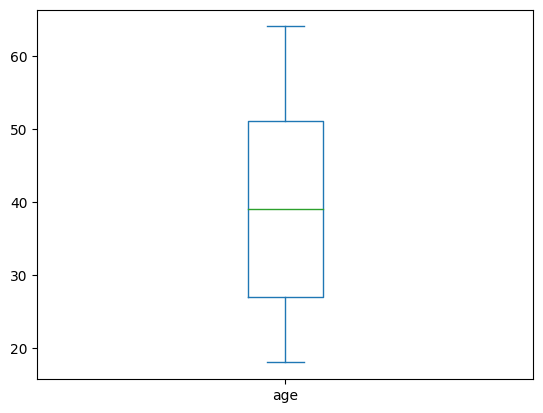

In [60]:
df['age'].plot(kind = 'box');

24. Visualize a distribuição das idades usando histograma.

<AxesSubplot: ylabel='Frequency'>

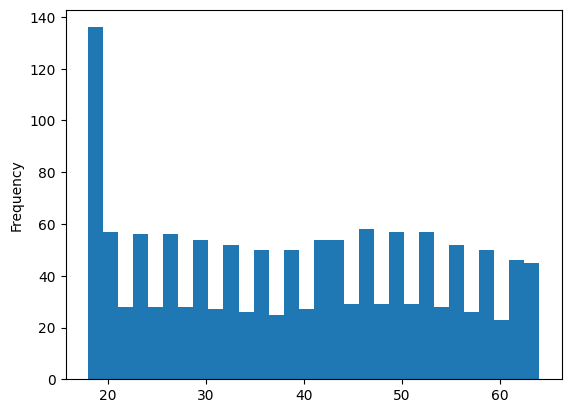

In [62]:
df['age'].plot(kind = 'hist', bins = 30)